In [1]:
from datasets import Dataset, DatasetDict
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
# https://data.stackexchange.com/travel/query/1869449/visa-question-and-answers
import matplotlib.pyplot as plt

d:\Acads\Sem - 1\CS 505 Natural Language Processing\Research Project Repo\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATASET_PATH = "../Datasets/Visa_Question_Stack_Exchange_V3.csv"

In [3]:
dataset_df = pd.read_csv(DATASET_PATH, header=0)
dataset_df.head

<bound method NDFrame.head of        QScore                                          Post Link  \
0          30  {\r\n  "id": 11,\r\n  "title": "What is the be...   
1          30  {\r\n  "id": 11,\r\n  "title": "What is the be...   
2          30  {\r\n  "id": 11,\r\n  "title": "What is the be...   
3          30  {\r\n  "id": 11,\r\n  "title": "What is the be...   
4          25  {\r\n  "id": 136,\r\n  "title": "Is it safe to...   
...       ...                                                ...   
26611       5  {\r\n  "id": 192346,\r\n  "title": "Traveling ...   
26612       6  {\r\n  "id": 192355,\r\n  "title": "Suggestion...   
26613       6  {\r\n  "id": 192355,\r\n  "title": "Suggestion...   
26614       6  {\r\n  "id": 192355,\r\n  "title": "Suggestion...   
26615       3  {\r\n  "id": 192358,\r\n  "title": "USA B2 vis...   

                                                   Title  \
0      What is the best way to obtain visas for the T...   
1      What is the best way to ob

In [4]:
column_refined_df = dataset_df[["Tags", "Question Body", "Answer Body", "AScore", "IsAcceptedAnswer"]]
# column_refined_df
max_score = np.max(dataset_df["AScore"])
# print(max_score)
def remove_html_tags(row):
    row["Question Body"] = BeautifulSoup(row['Question Body'], 'html.parser').get_text()
    row["Answer Body"] = BeautifulSoup(row['Answer Body'], 'html.parser').get_text()
    row["Tags"] = ",".join(row["Tags"][1:-1].split("><"))
    # row["AScore"] /= max_score
    return row

column_refined_df = column_refined_df.apply(remove_html_tags, axis=1)
column_refined_df

,Tags,Question Body,Answer Body,AScore,IsAcceptedAnswer
0,"russia,visas,china,mongolia,trans-siberian",I'm planning on taking the trans-Siberian / tr...,You're very unlikely to get them rejected if y...,29,1
1,"russia,visas,china,mongolia,trans-siberian",I'm planning on taking the trans-Siberian / tr...,I was looking into the same journey recently a...,10,0
2,"russia,visas,china,mongolia,trans-siberian",I'm planning on taking the trans-Siberian / tr...,"For the record, it is not necessary to go thro...",5,0
3,"russia,visas,china,mongolia,trans-siberian",I'm planning on taking the trans-Siberian / tr...,"As I know, in Russia visas can be achieved in ...",12,0
4,"safety,transportation,middle-east,war-zones,yemen","I have been wanting to travel to Socotra, Yeme...",The trees look amazing!\nAccording to Wikitrav...,5,0
...,...,...,...,...,...
26611,"germany,residence-permits",I am a non-EU citizen who recently moved to Ge...,Having a Fiktionsbescheinigung does not invali...,0,0
26612,"indian-citizens,short-connections,ams,delta-ai...",I am an Indian citizen (Indian Passport) who i...,There's not much you can do at this point to i...,4,0
26613,"indian-citizens,short-connections,ams,delta-ai...",I am an Indian citizen (Indian Passport) who i...,That is indeed a close connection with an infa...,6,0
26614,"indian-citizens,short-connections,ams,delta-ai...",I am an Indian citizen (Indian Passport) who i...,"I agree with the other answers, they have valu...",1,0


In [5]:
def get_len(q, a):
    return len(q.split()) + len(a.split())

lengths = column_refined_df.apply(lambda row: get_len(row["Question Body"], row["Answer Body"]), axis = 1)

In [6]:
lengths.describe()

count    26616.000000
mean       276.787083
std        192.302773
min         28.000000
25%        153.000000
50%        228.000000
75%        343.000000
max       3830.000000
dtype: float64

In [7]:
# column_refined_df.groupby('Question Body')['IsAcceptedAnswer'].sum()[column_refined_df.groupby('Question Body')['IsAcceptedAnswer'].sum() > 1]

(array([2.6248e+04, 3.2500e+02, 3.6000e+01, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-14. ,  43.3, 100.6, 157.9, 215.2, 272.5, 329.8, 387.1, 444.4,
        501.7, 559. ]),
 <BarContainer object of 10 artists>)

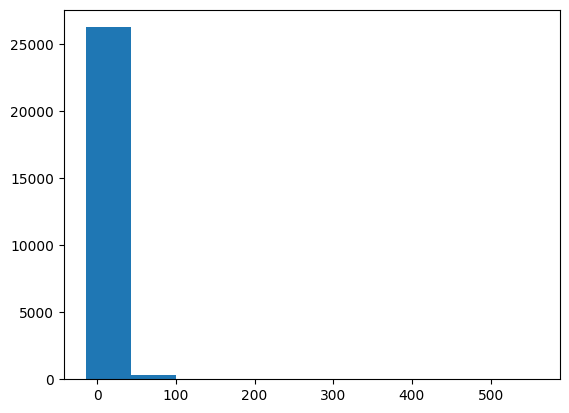

In [8]:
plt.hist(column_refined_df['AScore'])

In [9]:
column_refined_df[column_refined_df['AScore'] <= 0].shape

(2012, 5)

In [10]:
column_refined_df[column_refined_df['AScore'] > 15].shape

(2035, 5)

In [11]:
# Preprocessing
hf_dataset = Dataset.from_pandas(column_refined_df)
print(hf_dataset)

Dataset({
    features: ['Tags', 'Question Body', 'Answer Body', 'AScore', 'IsAcceptedAnswer'],
    num_rows: 26616
})


In [12]:
train_test_dict = hf_dataset.train_test_split(test_size=0.25)
test_val_split = train_test_dict['test'].train_test_split(test_size=0.5)
hf_dataset = DatasetDict({
    'train': train_test_dict['train'],
    'validation': test_val_split['train'],
    'test': test_val_split['test']
})
hf_dataset = hf_dataset.rename_column("Question Body", "question")
hf_dataset = hf_dataset.rename_column("Answer Body", "answer")
hf_dataset = hf_dataset.rename_column("AScore", "vote_score")
hf_dataset = hf_dataset.rename_column("Tags", "meta_tags")
hf_dataset = hf_dataset.rename_column("IsAcceptedAnswer", "Accepted")
hf_dataset

DatasetDict({
    train: Dataset({
        features: ['meta_tags', 'question', 'answer', 'vote_score', 'Accepted'],
        num_rows: 19962
    })
    validation: Dataset({
        features: ['meta_tags', 'question', 'answer', 'vote_score', 'Accepted'],
        num_rows: 3327
    })
    test: Dataset({
        features: ['meta_tags', 'question', 'answer', 'vote_score', 'Accepted'],
        num_rows: 3327
    })
})

In [13]:
hf_dataset.save_to_disk("../Datasets/Visa_QA_V3")

Saving the dataset (0/1 shards):   0%|          | 0/19962 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 3327/3327 [00:00<00:00, 59406.17 examples/s]
